**Iris Flowers ML Project**

This is perhaps the best known database to be found in the pattern
       recognition literature.  Fisher's paper is a classic in the field
       and is referenced frequently to this day.  (See Duda & Hart, for
       example.)  The data set contains 3 classes of 50 instances each,
       where each class refers to a type of iris plant.  One class is
       linearly separable from the other 2,the latter are NOT linearly
       separable from each other.

 ----------------
Predicted attribute: class of iris plant.
This is an exceedingly simple domain

 Number of Instances: 150 (50 in each of three classes)

 Number of Attributes: 4 numeric, predictive attributes and the class

 Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class:
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

**Data Analysis**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [101]:

dt = pd.read_excel('/content/iris.xlsx')

In [102]:
dt.head(10)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [103]:
dt.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.00000,150.000000,150.000000
mean,5.840667,3.05000,3.760000,1.198667
std,0.830711,0.42722,1.762548,0.763161
min,4.300000,2.00000,1.000000,0.100000
25%,5.100000,2.80000,1.600000,0.300000
50%,5.800000,3.00000,4.350000,1.300000
75%,6.400000,3.30000,5.100000,1.800000
max,7.900000,4.40000,6.900000,2.500000


**Checking number of features and their Datatypes.**

In [104]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [105]:
dt['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [106]:
##getting total number of null values.

dt.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

**Exploratory Data Analysis**

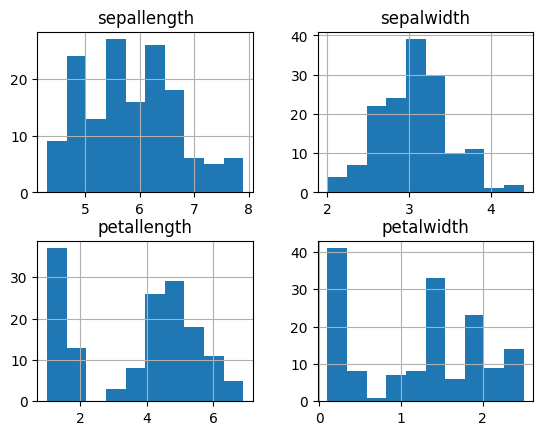

In [107]:
dt.hist()
plt.show()

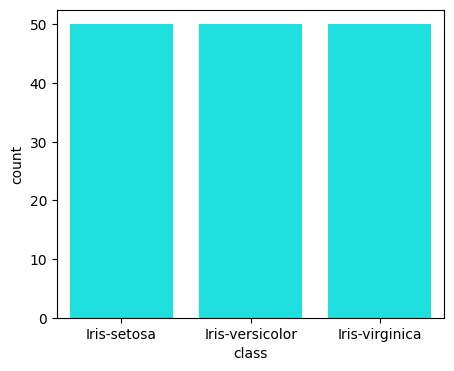

In [108]:
plt.figure(figsize=(5,4))
sns.countplot(x=dt['class'],color='cyan')
plt.show()

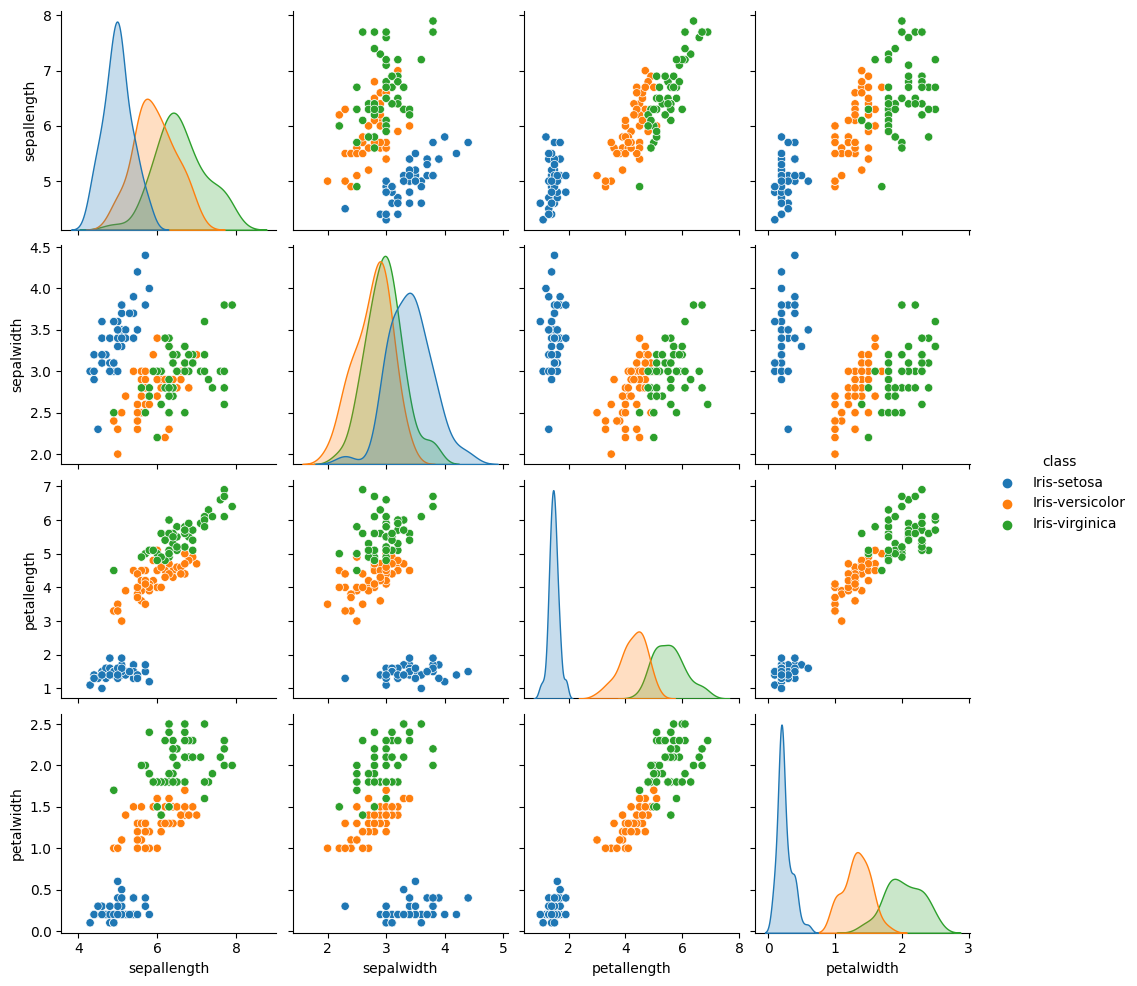

In [109]:
sns.pairplot(dt, hue ='class')
plt.show()



<ipython-input-110-151e04df75d7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =dt.corr()


<Axes: >

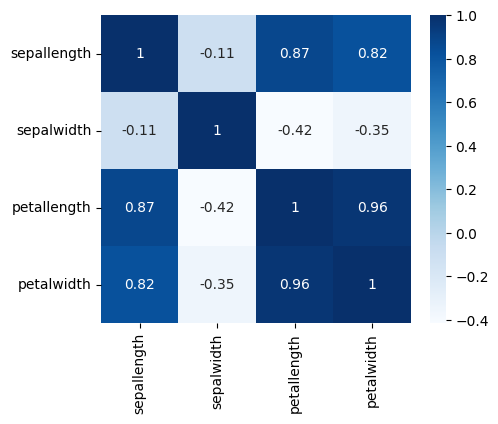

In [110]:
corr =dt.corr()
fig, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot = True, cmap= "Blues")


**Encoding Target Variable Using Label Encoder**

In [111]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()
dt['class']= label_encoder.fit_transform(dt['class'])


In [112]:
dt.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Separating Dataset into Training Set , Test Set**

In [113]:
from sklearn.model_selection import train_test_split

X = dt.drop(columns=['class'])
Y = dt['class']

# Use 'test_size' for the proportion of test data, and 'random_state' for reproducibility.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [114]:
X

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [115]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

**Building the algorithm**

**LogisticRegression**

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
lr= LogisticRegression()

In [118]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
# Predict on the test data
lr_pred = lr.predict(x_test)


In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Train accuracy of Logistic Regression is", lr.score(x_train, y_train))
# Calculate accuracy


# Generate a classification report
class_report = classification_report(y_test, lr_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Train accuracy of Logistic Regression is 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**KNeighborsClassifier**

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [122]:
# Predict on the test data
knn_pred = knn.predict(x_test)

In [123]:
print("Train accuracy of Logistic Regression is", knn.score(x_train, y_train))

# Generate a classification report
class_report = classification_report(y_test, knn_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix:\n", conf_matrix)

Train accuracy of Logistic Regression is 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Decision Tree Classifier**

In [124]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier


# Create Decision Tree classifer object
dd = DecisionTreeClassifier()

# Train Decision Tree Classifer
dd = dd.fit(x_train,y_train)

In [125]:
dd_pred = dd.predict(x_test)

In [127]:
print("Train accuracy of Logistic Regression is", dd.score(x_train, y_train)*100)

# Generate a classification report
class_report = classification_report(y_test, dd_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, dd_pred)
print("Confusion Matrix:\n", conf_matrix)



Train accuracy of Logistic Regression is 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
